# Common

## Imports

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from sklearn import metrics
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

## Functions

In [24]:
from sklearn.preprocessing import normalize

def calculate_null_accuracy(y):
    vals, counts = np.unique(y, return_counts=True)
    
    norm = counts / np.sum(counts)
    
    return max(norm)

# Datasets

## Wine Quality

Null Accuracy: 53.47 %


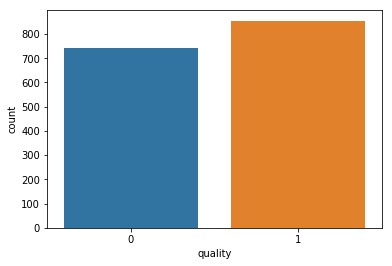

In [25]:
wine = pd.read_csv('datasets/wine-quality/winequality-red.csv', sep=';')
# Preprocess the data
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].unique()

label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

# separate the dataset as response variable and feature variables
wineX = wine.drop('quality', axis=1)
winey = wine['quality']
wine_labels = ['bad wine', 'good wine']

# look at distribution
wine_null = calculate_null_accuracy(winey)
print("Null Accuracy: %.2f %%" % (wine_null*100))

sns.countplot(wine['quality'])

## Digits

Null Accuracy: 10.18 %


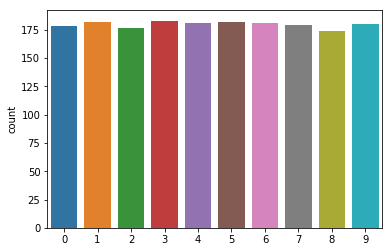

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()

digitsX = digits.data
digitsy = digits.target
digits_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# look at distribution
digits_null = calculate_null_accuracy(digitsy)
print("Null Accuracy: %.2f %%" % (digits_null*100))

sns.countplot(digitsy)

## Test & Training Sets

In [27]:
'''
X = wineX
y = winey
labels = wine_labels
'''
X = digitsX
y = digitsy
labels = digits_labels
data = scale(X)

testSize = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=0)

numSamples, numFeatures = X.shape
numClusters = len(np.unique(y))
print("Number of samples: %d\nNumber of features: %d\nClusters: %d" %(numSamples, numFeatures, numClusters))


Number of samples: 1797
Number of features: 64
Clusters: 10


## Report Notes
Reading in data and scaling all feature values. 

### Wine
- Samples = 1599
- Features = 11
- Null Accuracy = 53.47%

### Digits
- Samples = 1797
- Features = 64
- Null Accuray = 10.18%

# Cluster
Choose your own measure of distance similarity

distance used: EXPLAIN

## K-means
How did you choose k? Elbow method - see below


### Wine

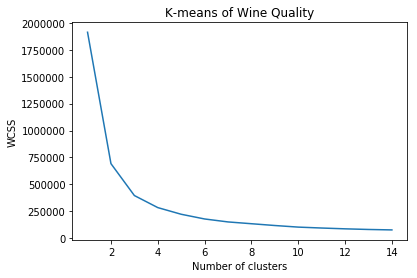

In [28]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=0)
    kmeans.fit(wineX)
    wcss.append(kmeans.inertia_)
fig, ax = plt.subplots()
plt.plot(range(1,15),wcss)
plt.title('K-means of Wine Quality')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

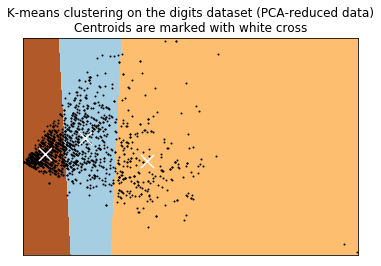

In [30]:
# visualize the clusters
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=0)
y = kmeans.fit_predict(wineX)

# Scatter plotting for (x,y) with label 1 as Cluster 1 in color c = red and points in size s = 50
plt.scatter(wineX[y == 0, 0], wineX[y == 0, 1], s = 50, c = 'red', label = 'Cluster 1')

# Scatter plotting for (x,y) with label 2 as Cluster 2 in color c = blue and points in size s = 50
plt.scatter(wineX[y == 1, 0], wineX[y == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
 
# Scatter plotting for (x,y) with label 3 as Cluster 3 in color c = green and points in size s = 50
plt.scatter(wineX[y == 2, 0], wineX[y == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

# Scatter plotting the centroids with label = 'Centroids' in color c = cyan and points in size s = 100
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'cyan', label = 'Centroids')

plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

### Digits

In [ ]:
# code based on https://www.kaggle.com/sinansonmez35/kmeans-clustering-of-wines

wcss = []
for i in range(5,15):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=0)
    kmeans.fit(digitsX)
    wcss.append(kmeans.inertia_)
fig, ax = plt.subplots()
plt.plot(range(5,15),wcss)
plt.title('K-means of Digits')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Expectation Maximization

## Report Notes
### k-means
WCSS = Within-cluster-sum-of-squares
"WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. The idea is to minimise the sum. Suppose there are n observation in a given dataset and we specify n number of clusters (k = n) then WCSS will become zero since data points themselves will act as centroids and the distance will be zero and ideally this forms a perfect cluster, however this doesn’t make any sense as we have as many clusters as the observations. Thus there exists a threshold value for K which we can find using the Elbow point graph." 
- https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/

Elbow Method
"We can find the optimum value for K using an Elbow point graph. We randomly initialise the K-Means algorithm for a range of K values and will plot it against the WCSS for each K value." The optimal value for k is then chosen based on where the "elbow" in the chart is, where the WCSS value may continue decreasing, but not at any quick rate.


#### Wine
Elbow at k=3 or 4. Clusters = 2

#### Digits
Elbow at 9 or 10. Clusters = 10


### Expectation Maximization

#### Wine

#### Digits

# Dimensionality Reduction

## PCA
- What is the distribution of eigenvalues?
- Assuming you only generate k projections (i.e. you do dimensionality reduction), how well is the data reconstructred


## ICA
- How kurtotic are the distributions
- Do the projection axes seem "meaningful"?

## Randomized Projections
- Assuming you only generate k projections (i.e. you do dimensionality reduction) how well is the data reconstructed?
- How much variation did you get when you re-ran several times?

## Dealer's Choice

## Report Notes
### Wine

### Digits

# Clustering + Dimensionality Reduction
2 datasets, 4 dimensionality reductions, 2 algorithms (16 problems)

- Did you get the same clusters as before? Why or why not?

In [ ]:
#
# THIS IS AN EXAMPLE OF PCA DA AND THEN USING KMEANS
# 
# code based on https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
reduced_data = PCA(n_components=2).fit_transform(wineX)
kmeans = KMeans(init='k-means++', n_clusters=3, random_state=0)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

###


In [ ]:
# code based on example found at:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

sample_size = 300 # TODO -why this?

def bench_k_means(estimator, labels, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
   

In [ ]:
 
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')  
print(82 * '_')


bench_k_means(KMeans(init='k-means++', n_clusters=numClusters, n_init=10),
              labels = y, name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=numClusters, n_init=10),
              labels = y, name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=numClusters).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=numClusters, n_init=1),
              labels = y, name="PCA-based", data=data)

## Report Notes
### Wine

### Digits

# NN with Dimensionality Reduction
Apply the dimensionality reduction algorithms to one of your datasets from assignment 1 (already done above (one wine set)) and rerun your neural network learner on the newly projected data.
- Any differences in performance?
- Any differences in speed?
- Any other differences?

## Report Notes
### Wine

### Digits

# NN with Dimensionality Reduction and Clustering Applied to Dataset
Apply the clustering algorithms to the same dataset to which you just applied the dimensionality reduction algorithms, treating the clusters as if they were new features. In other words, treat the clustering algorithms as if they were dimensionality reduction algorithms. 

Clustering -> neural network

Rerun your neural network learner on the newly projected data.
- Any differences in performance?
- Any differences in speed?
- Any other differences?

## Report Notes
### Wine

### Digits


# General Notes
- Explanation of your methods
- How are these algorithms the same as, different from, and interact with your earlier work
- Clusters
    - A description of the clusters that you got
    - Why did you get the clusters you did
    - Do they make “sense”? See isbell paper
    - If you used data that already had labels (For example data from a classification problem from assignment #1) did the clusters line up with the labels?
    - Do they otherwise line up naturally?
    - Why or why not?
    - Compare and contrast the different algorithms?
    - What sort of changes might you make to each of those algorithms to improve performance?
    - How much performance was due to the problems you chose?
    - Justify your analysis with data explicitly
- It might be difficult to generate the same kinds of graphs for the part of the assignment. Come up with some way to describe the kinds of clusters you get. If you can do it visually, all the better.


















































In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

X_digits, y_digits = load_digits(return_X_y=True)
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

print(labels)